## Cats vs Dogs

### Dataset

In [3]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/home/naska/.kaggle’: File exists


In [7]:
! cp kaggle.json /home/naska/kaggle/.kaggle.json

cp: cannot create regular file '/home/naska/kaggle/.kaggle.json': No such file or directory


In [8]:
! chmod 600 /home/naska/kaggle/.kaggle.json

chmod: cannot access '/home/naska/kaggle/.kaggle.json': No such file or directory


In [2]:
import kaggle # non serve

OSError: Could not find kaggle.json. Make sure it's located in /home/naska/.kaggle. Or use the environment method.

In [6]:
! kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

100%|███████████████████████████████████████▊| 785M/788M [00:34<00:00, 23.4MB/s]
100%|████████████████████████████████████████| 788M/788M [00:34<00:00, 23.9MB/s]


In [10]:
! unzip microsoft-catsvsdogs-dataset.zip

Archive:  microsoft-catsvsdogs-dataset.zip
  inflating: MSR-LA - 3467.docx      
  inflating: PetImages/Cat/0.jpg     
  inflating: PetImages/Cat/1.jpg     
  inflating: PetImages/Cat/10.jpg    
  inflating: PetImages/Cat/100.jpg   
  inflating: PetImages/Cat/1000.jpg  
  inflating: PetImages/Cat/10000.jpg  
  inflating: PetImages/Cat/10001.jpg  
  inflating: PetImages/Cat/10002.jpg  
  inflating: PetImages/Cat/10003.jpg  
  inflating: PetImages/Cat/10004.jpg  
  inflating: PetImages/Cat/10005.jpg  
  inflating: PetImages/Cat/10006.jpg  
  inflating: PetImages/Cat/10007.jpg  
  inflating: PetImages/Cat/10008.jpg  
  inflating: PetImages/Cat/10009.jpg  
  inflating: PetImages/Cat/1001.jpg  
  inflating: PetImages/Cat/10010.jpg  
  inflating: PetImages/Cat/10011.jpg  
  inflating: PetImages/Cat/10012.jpg  
  inflating: PetImages/Cat/10013.jpg  
  inflating: PetImages/Cat/10014.jpg  
  inflating: PetImages/Cat/10015.jpg  
  inflating: PetImages/Cat/10016.jpg  
  inflating: PetImages/Cat/1

### Vediamo come sono le immagini
you can skip to Keras Exercise

In [11]:
from keras.layers import Resizing
import tensorflow as tf
import PIL

In [12]:
tf.random.normal([1, 40, 60, 1])

<tf.Tensor: shape=(1, 40, 60, 1), dtype=float32, numpy=
array([[[[ 0.20306599],
         [ 2.8993213 ],
         [ 1.3453323 ],
         ...,
         [ 1.5499946 ],
         [ 0.40053722],
         [-1.282823  ]],

        [[-0.3051283 ],
         [ 1.0757103 ],
         [ 1.6500252 ],
         ...,
         [-0.9617665 ],
         [ 0.94770247],
         [ 1.4942695 ]],

        [[-0.7459087 ],
         [ 1.0804137 ],
         [-1.2772758 ],
         ...,
         [ 0.0193186 ],
         [ 0.7203809 ],
         [-0.36949402]],

        ...,

        [[-0.2953483 ],
         [ 1.017755  ],
         [ 1.3224702 ],
         ...,
         [ 1.772339  ],
         [ 0.30512664],
         [-0.05376932]],

        [[ 1.299079  ],
         [-0.575131  ],
         [-0.21920252],
         ...,
         [-2.1203527 ],
         [ 0.4080879 ],
         [ 1.2916192 ]],

        [[-0.7760331 ],
         [ 0.6798665 ],
         [-0.54019433],
         ...,
         [ 1.2785593 ],
         [-0.7432341

In [13]:
Resizing(height= 100, width=100, crop_to_aspect_ratio=True)(img).shape

NameError: name 'img' is not defined

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(trans.numpy().astype(int))

In [ ]:
img = PIL.Image.open("PetImages/Cat/0.jpg")

In [ ]:
img.size

In [ ]:
trans = Resizing(height=100, width=100, crop_to_aspect_ratio=True)(img)

In [ ]:
img

In [ ]:
Domanda: se ho solo immagini di gatti, e voglio che la rete impari a riconoscerli, ma non ho altre immagini di altre cose. 
+ Come faccio a fargli imparare a riconoscere i gatti?
+ -> autoencoder (o classe negativa: ma sarebbe tutto il resto del mondo)

# Autoencoder: una rete... vedi appunti

### Esercizio
1. Rete Neurale con validation set 20%
2. MLP, LeNet5 e confronto
3. vdere come migliorare (non sarà enough)
4. transfer learning

In [14]:
from keras.utils import image_dataset_from_directory

In [66]:
trainset, testset = image_dataset_from_directory(
    directory="PetImages",
    label_mode = "int", # metterà 0-1
    image_size=(100, 100),
    shuffle = True,
    seed = 2,
    validation_split=0.2,
    subset = "both",
    crop_to_aspect_ratio=True
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Using 5000 files for validation.


In [ ]:
next(iter(trainset))

In [67]:
# prendo solo 40 immagini x train e 40 per test
trainset = trainset.take(40)
testset = testset.take(40)

In [ ]:
# come usare la fit() con Dataset Tensorflow (diverso da tensori)
# passa solo la x che contiene anche la y. y non passarlo
# batch_size non serve, l'oggetto dataset ritorna già batch_size
# validation split non funziona, a meno di passare un altro dataset come validation data
# shuffle non funziona

### Richiesta:
- addestrare MLP su cats vs dogs
- addestrare CNN (come la LeNet5) su cats vs dogs (accuracy su test set)

#### MLP

In [57]:
from keras import Sequential
import keras.layers as layers
import keras

In [40]:
# normalizzazione
vedi la Lambda sotto

SyntaxError: invalid syntax (471692448.py, line 2)

In [68]:
mlp = Sequential(
    [
        layers.Flatten(),
        layers.Lambda(lambda x: x / 255.),
        layers.Dense(100, "relu"),
        layers.Dense(100, "relu"),
        layers.Dense(100, "relu"),
        layers.Dense(2) # potrebbe andare anche 1; activation nulla o softmax
    ]
)

In [69]:
mlp.compile(
    optimizer=keras.optimizers.Adam(), 
    loss = keras.losses.SparseCategoricalCrossentropy(), 
    metrics=["accuracy"]
)

In [71]:
mlp.fit(x=trainset, epochs=20, validation_data=testset)

Epoch 1/20
40/40 [==============================] - 7s 157ms/step - loss: 0.6931 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5078
Epoch 2/20
40/40 [==============================] - 7s 155ms/step - loss: 0.6931 - accuracy: 0.5266 - val_loss: 0.6931 - val_accuracy: 0.5078
Epoch 3/20
40/40 [==============================] - 7s 154ms/step - loss: 0.6931 - accuracy: 0.5211 - val_loss: 0.6931 - val_accuracy: 0.5078
Epoch 4/20
40/40 [==============================] - 7s 155ms/step - loss: 0.6931 - accuracy: 0.5211 - val_loss: 0.6931 - val_accuracy: 0.5078
Epoch 5/20
40/40 [==============================] - 7s 159ms/step - loss: 0.6931 - accuracy: 0.5156 - val_loss: 0.6931 - val_accuracy: 0.5078
Epoch 6/20
40/40 [==============================] - 7s 169ms/step - loss: 0.6931 - accuracy: 0.5195 - val_loss: 0.6931 - val_accuracy: 0.5078
Epoch 7/20
40/40 [==============================] - 7s 165ms/step - loss: 0.6931 - accuracy: 0.5211 - val_loss: 0.6931 - val_accuracy: 0.5078
Epoch 

In [54]:
# non va granchè, accuracy 58% (prof.). però stiamo usando un MLP, architettura obsoleta

#### Rete CNN

In [75]:
conv = Sequential(
    [
        layers.Lambda(lambda x: x / 255., input_shape=[100,100,3]),
        layers.Conv2D(32, kernel_size=5, padding="same", activation="relu"),
        layers.Conv2D(32, kernel_size=5, padding="same", activation="relu"),
        layers.MaxPool2D(),
        layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
        layers.MaxPool2D(),
        layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
        layers.MaxPool2D(),
        layers.Conv2D(128, kernel_size=3, padding="same", activation="relu"),
        layers.MaxPool2D(),
        layers.Conv2D(128, kernel_size=3, padding="same", activation="relu"),
        layers.Flatten(),
        layers.Dense(100, "relu"),
        layers.Dense(2),
    ]
)
# di solito il numero di filtri viene aumentato per imparare più feature

In [76]:
conv.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_8 (Lambda)           (None, 100, 100, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 100, 32)      2432      
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 32)      25632     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 50, 50, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 25, 25, 64)        0         
 g2D)                                                 

In [77]:
conv.compile(
    optimizer=keras.optimizers.Adam(), 
    loss = keras.losses.SparseCategoricalCrossentropy(), 
    metrics=["accuracy"]
)

In [78]:
conv.fit(x=trainset, epochs=30, validation_data=testset)

Epoch 1/30
40/40 [==============================] - 42s 994ms/step - loss: 1.2672 - accuracy: 0.4797 - val_loss: 0.6931 - val_accuracy: 0.4922
Epoch 2/30
40/40 [==============================] - 39s 974ms/step - loss: 0.6931 - accuracy: 0.4727 - val_loss: 0.6931 - val_accuracy: 0.4922
Epoch 3/30
40/40 [==============================] - 39s 961ms/step - loss: 0.6931 - accuracy: 0.4758 - val_loss: 0.6931 - val_accuracy: 0.4922
Epoch 4/30
40/40 [==============================] - 40s 977ms/step - loss: 0.6931 - accuracy: 0.4820 - val_loss: 0.6931 - val_accuracy: 0.4922
Epoch 5/30
40/40 [==============================] - 41s 1s/step - loss: 0.6931 - accuracy: 0.4805 - val_loss: 0.6931 - val_accuracy: 0.4922
Epoch 6/30
40/40 [==============================] - 41s 1s/step - loss: 0.6931 - accuracy: 0.4766 - val_loss: 0.6931 - val_accuracy: 0.4922
Epoch 7/30
40/40 [==============================] - 40s 981ms/step - loss: 0.6931 - accuracy: 0.4805 - val_loss: 0.6931 - val_accuracy: 0.4922
Epoch

#### Data Augmentation per migliorare performance
ovvero modificare il dataset (enrich it). 
+ vedi keras.layers.Random*

In [80]:
data_augmentation = Sequential(
    [
        layers.RandomRotation(factor = (-0.1, 0.1)),
        layers.RandomZoom(height_factor=0.4),
        layers.RandomBrightness(factor=0.4),
        layers.RandomFlip(mode="horizontal")
    ]
)

In [81]:
imgs = next(iter(trainset))[0]

In [82]:
augmented_imgs = data_augmentation(imgs)

In [83]:
import matplotlib.pyplot as plt

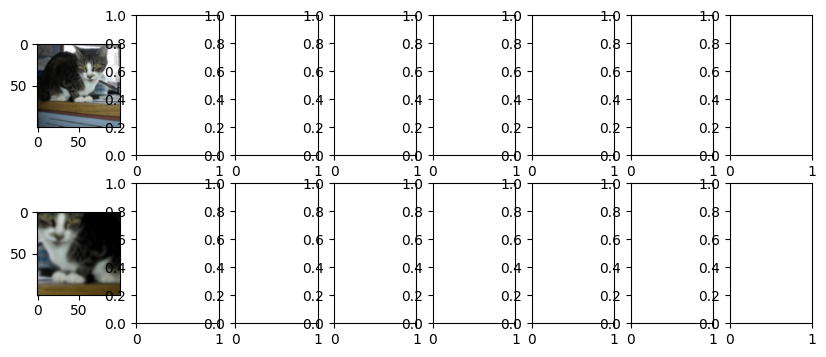

In [91]:
fig, axis = plt.subplots(2, 8, figsize=(10, 4))
for i in range(8):
    axis[0][i].imshow(imgs[i]/255)
    axis[1][i].imshow(augmented_imgs[i]/255)
    break

#### Rete Convoluzionale con prima Data Augm.

In [88]:
conv_augmented = Sequential(
    [
        data_augmentation,
        conv
    ]
)

In [89]:
conv.compile(
    optimizer=keras.optimizers.Adam(), 
    loss = keras.losses.SparseCategoricalCrossentropy(), 
    metrics=["accuracy"]
)

In [90]:
conv.fit(x=trainset, epochs=30, validation_data=testset) # initial_epoch = 31 (utile per i log, in ogni caso TF continua da dove aveva lasciato)

Epoch 1/30
40/40 [==============================] - 46s 1s/step - loss: 0.6931 - accuracy: 0.4711 - val_loss: 0.6931 - val_accuracy: 0.4922
Epoch 2/30
40/40 [==============================] - 43s 1s/step - loss: 0.6931 - accuracy: 0.4812 - val_loss: 0.6931 - val_accuracy: 0.4922
Epoch 3/30
40/40 [==============================] - 42s 1s/step - loss: 0.6931 - accuracy: 0.4789 - val_loss: 0.6931 - val_accuracy: 0.4922
Epoch 4/30
40/40 [==============================] - 44s 1s/step - loss: 0.6931 - accuracy: 0.4797 - val_loss: 0.6931 - val_accuracy: 0.4922
Epoch 5/30
40/40 [==============================] - 42s 1s/step - loss: 0.6931 - accuracy: 0.4766 - val_loss: 0.6931 - val_accuracy: 0.4922
Epoch 6/30
40/40 [==============================] - 42s 1s/step - loss: 0.6931 - accuracy: 0.4812 - val_loss: 0.6931 - val_accuracy: 0.4922
Epoch 7/30
40/40 [==============================] - 43s 1s/step - loss: 0.6931 - accuracy: 0.4758 - val_loss: 0.6931 - val_accuracy: 0.4922
Epoch 8/30
40/40 [==

In [ ]:
# performance un po' meglio (78% prof.)
# DataAugmentation: per noi (umani) sono trasformazioni banali, per il modello no

## Transfer Learning

In [ ]:
da keras.applications

In [100]:
resNet = keras.applications.ResNet50V2( # 50 strati tra Convoluzionali e Densi
    include_top = False,
     weights='imagenet', # pesi già okay da imagenet
    input_shape=(224,224,3)
)

In [101]:
keras.utils.plot_model(resNet) # vedi file di output

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [102]:
resNet.summary() # non c'è il classificatore finale (include top = False) perché lo mettiamo noi

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                         

In [103]:
myresnet = Sequential(
    [
        layers.Resizing(224, 224),
        data_augmentation,
        layers.Lambda(lambda x: keras.applications.resnet50.preprocess_input(x)),
        resNet,
        layers.Flatten(), # ricordati di metterla
        layers.Dense(100),
        layers.Dense(2)
    ]
)

### Fine-Tuning 
+ (dello strato denso inizializzato a caso) -> da feedback errati agli strati precedenti
+ quindi: **freeze** degli strati precedenti, li rendo non trainable, addestro il Dense layer

In [104]:
resNet.trainable = False
myresnet.summary()
# non vengono addestrati ma sono usati? (gli strati precedenti, quelli della resNet)

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [105]:
myresnet.compile(
    optimizer=keras.optimizers.Adam(), 
    loss = keras.losses.SparseCategoricalCrossentropy(), 
    metrics=["accuracy"]
)

In [106]:
conv.fit(x=trainset, epochs=30, validation_data=testset) # initial_epoch = 31 (utile per i log, in ogni caso TF continua da dove aveva lasciato)

Epoch 1/30
40/40 [==============================] - 55236s 1416s/step - loss: 7.3955 - accuracy: 0.4844 - val_loss: 8.1850 - val_accuracy: 0.4922
Epoch 2/30
40/40 [==============================] - 162s 4s/step - loss: 8.4620 - accuracy: 0.4750 - val_loss: 8.1850 - val_accuracy: 0.4922
Epoch 3/30
24/40 [=================>............] - ETA: 35s - loss: 8.4788 - accuracy: 0.4740

KeyboardInterrupt: 

In [ ]:
# vedi file prof sotto

## Transfer Learning Prof.

In [107]:
resnet = keras.applications.ResNet50(include_top=False, input_shape=(224, 224, 3), weights='imagenet')

KeyboardInterrupt: 

In [ ]:
my_resnet = Sequential(
    [
        # layers.Resizing(224, 224),
        layers.Lambda(lambda x: keras.applications.resnet50.preprocess_input(x)),
        data_augmentation,
        resnet,
        layers.Flatten(), # o GlobalAveragePooling2D (stessa cosa; cerca)
        layers.Dense(256),
        layers.Dropout(0.5),
        layers.Dense(2)
    ]
)

In [ ]:
resnet.trainable = False

In [ ]:
my_resnet.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [ ]:
my_resnet.fit(x=trainset, epochs=100, validation_data=testset)

In [ ]:
resnet.layers

In [ ]:
resnet.summary() # sulla destra gli input degli strati a sx. ci sono anche 2 layer di input: la struttura delle ResNet è particolare

Note: 
+ con un modello pre-addestrato -> usare la funzione di pre-process del modello
+ ResNet: architettura particolare (concetto di Skip Connection, usato anche nei Transformers)
+ Audio -> spettrogramma ovvero immagine -> posso usare una ResNet

In [ ]:
# Fine-Tuning: posso anche scongelare gli ultimi n strati convoluzionali e addestrarli
# (dopo aver allenato il Classifier finale con i layer Conv congelati (altrimenti Classifier va a caso)

In [ ]:
for l in list(reversed(resnet.layers))[:20]: # ultimi strati: quelli meno universali
    # quelli iniziali vedono feature più piccole e comuni
    if isinstance(l, keras.layers.Conv2D): # se lo stato è Conv2D
        l.trainable = True # diventa addestrabile

In [ ]:
Activation Map -> outpout degli strati Conv
Receptive Field -> il neurone riesce a guardare caratteristche globali

### Note Generali

In [ ]:
+ Per capire se la rete sta allenando: guarda la Loss (se scende) e non le metriche discrete come la Accuracy